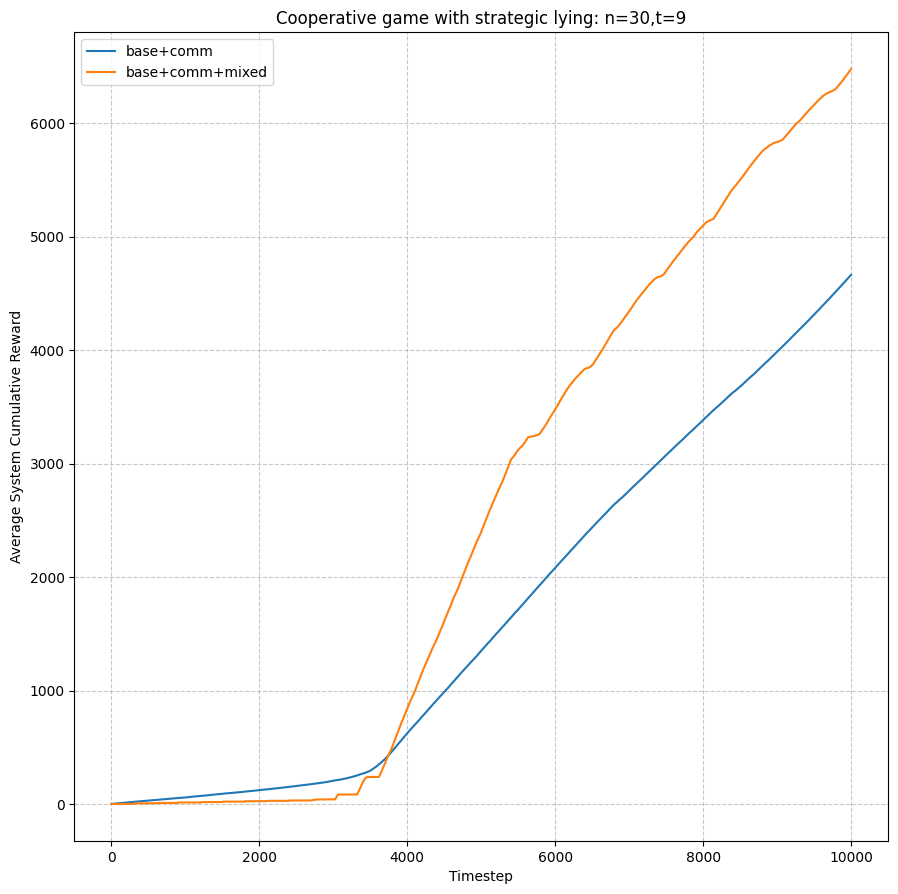

In [1]:
import matplotlib.pyplot as plt
import numpy as np

# set parameters
n = 30
t = 9
n_learner = 0
n_simple = 30

# load simulation results
cum_rew_1 = np.load(f'data/base_comm/n{n}t{t}_cum_rew_bc.npy')
cum_rew_2 = np.load(f'data/base_comm_mixed/n{n}t{t}_cum_rew_mixed{n_learner},{n_simple}.npy')

# average over the simulations
cum_rew_1 = np.mean(cum_rew_1, axis=0)
cum_rew_2= np.mean(cum_rew_2, axis=0)

# plot cum rew graphs
plt.title(f'Cooperative game with strategic lying: n={n},t={t}')
plt.xlabel('Timestep')
plt.ylabel('Average System Cumulative Reward')

plt.plot(cum_rew_1, label='base+comm')
plt.plot(cum_rew_2, label='base+comm+mixed')

fig = plt.gcf()
fig.set_size_inches(10.5, 10.5)

plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)


In [2]:
actions_1 = np.load(f'data/base_comm_mixed/n{n}t{t}_actions_mixed15,5.npy')

def moving_average(arr, window_size):
    moving_averages = []
    for i in range(len(arr) - window_size + 1):
        window = arr[i:i + window_size]
        average = sum(window) / window_size
        moving_averages.append(average)
    return moving_averages

for i in range(n):
    plt.plot(moving_average(actions_1[:,i], 20))

fig = plt.gcf()
plt.grid(True, linestyle='--', alpha=0.7)
fig.set_size_inches(12, 12)

FileNotFoundError: [Errno 2] No such file or directory: 'data/base_comm_mixed/n30t9_actions_mixed15,5.npy'

In [ ]:
struct_1 = np.load(f'data/base_comm_mixed/n{n}t{t}_cstruct_mixed0,20.npy')

sets_list = [set([i+1 for i, val in enumerate(row) if val == 1]) for row in struct_1]
print(sets_list)

